In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [114]:
from sklearn.cluster import KMeans

In [172]:
data1=pd.read_csv("C:/Users/guswn/OneDrive/바탕 화면/생활인구/2021생활인구.csv",encoding="utf-8")
data2=pd.read_csv("C:/Users/guswn/OneDrive/바탕 화면/생활인구/2022생활인구.csv",encoding="utf-8")


In [173]:
data1=data1.drop("Unnamed: 0",axis=1)

In [217]:
data1

,행정구역,202101생활인구,202102생활인구,202103생활인구,202104생활인구,202105생활인구,202106생활인구,202107생활인구,202108생활인구,202109생활인구,202110생활인구,202111생활인구,202112생활인구
0,강릉시,1.282018e+07,1.326394e+07,1.285179e+07,1.302539e+07,1.312221e+07,1.327626e+07,1.335346e+07,1.354503e+07,1.330791e+07,1.323954e+07,1.296923e+07,1.290825e+07
1,강진군,1.812608e+06,1.880161e+06,1.813781e+06,1.845180e+06,1.864538e+06,1.829817e+06,1.848549e+06,1.864596e+06,1.917847e+06,1.859237e+06,1.848734e+06,1.832842e+06
2,거제시,1.549939e+07,1.544691e+07,1.495750e+07,1.499137e+07,1.511589e+07,1.520504e+07,1.552519e+07,1.562103e+07,1.519213e+07,1.509066e+07,1.496396e+07,1.507065e+07
3,거창군,2.588604e+06,2.646880e+06,2.608955e+06,2.670800e+06,2.698885e+06,2.698147e+06,2.741642e+06,2.811483e+06,2.802329e+06,2.721820e+06,2.717140e+06,2.621808e+06
4,경산시,1.233183e+07,1.226369e+07,1.291200e+07,1.301321e+07,1.295393e+07,1.295948e+07,1.250516e+07,1.257971e+07,1.304590e+07,1.309746e+07,1.309429e+07,1.300994e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,홍성군,4.406900e+06,4.475774e+06,4.445701e+06,4.486979e+06,4.503826e+06,4.481794e+06,4.442831e+06,4.491032e+06,4.598154e+06,4.558005e+06,4.549396e+06,4.450257e+06
120,홍천군,3.554435e+06,3.776200e+06,3.601386e+06,3.842534e+06,3.978102e+06,4.132118e+06,4.366279e+06,4.501099e+06,4.132701e+06,4.138555e+06,3.879752e+06,3.830495e+06
121,화순군,3.206325e+06,3.300292e+06,3.260567e+06,3.314148e+06,3.320639e+06,3.305914e+06,3.348678e+06,3.401621e+06,3.415995e+06,3.315475e+06,3.316387e+06,3.256792e+06
122,화천군,1.905889e+06,1.849717e+06,1.818782e+06,1.901925e+06,1.938010e+06,2.024351e+06,2.078638e+06,2.070710e+06,1.956658e+06,1.924729e+06,1.861642e+06,1.791949e+06


In [222]:
df2=(data2.iloc[:,1:]-data2.mean(axis=0))/data2.std(axis=0)
df2.index=data2["행정구역"]

C:\Users\guswn\AppData\Local\Temp\ipykernel_3716\1555342776.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2=(data2.iloc[:,1:]-data2.mean(axis=0))/data2.std(axis=0)


In [221]:
df1=(data1.iloc[:,1:]-data1.mean(axis=0))/data1.std(axis=0)
df1.index=data1["행정구역"]

C:\Users\guswn\AppData\Local\Temp\ipykernel_3716\3436951407.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1=(data1.iloc[:,1:]-data1.mean(axis=0))/data1.std(axis=0)


In [224]:
df1

,202101생활인구,202102생활인구,202103생활인구,202104생활인구,202105생활인구,202106생활인구,202107생활인구,202108생활인구,202109생활인구,202110생활인구,202111생활인구,202112생활인구
행정구역,,,,,,,,,,,,
강릉시,0.944960,0.998767,0.951970,0.966979,0.978722,1.002914,1.005890,1.027180,0.994882,0.988164,0.952405,0.949449
강진군,-0.576943,-0.580422,-0.580418,-0.587544,-0.590471,-0.596866,-0.599844,-0.607046,-0.595369,-0.597675,-0.592186,-0.580909
거제시,1.315386,1.301595,1.244302,1.240334,1.256618,1.272483,1.308997,1.317637,1.257953,1.246117,1.229464,1.248241
거창군,-0.469654,-0.474061,-0.470026,-0.472748,-0.474172,-0.475506,-0.475196,-0.474566,-0.471879,-0.477474,-0.471568,-0.471893
경산시,0.877440,0.860010,0.960328,0.965285,0.955266,0.958640,0.887492,0.892121,0.958302,0.968364,0.969774,0.963500
...,...,...,...,...,...,...,...,...,...,...,...,...
홍성군,-0.218257,-0.220352,-0.215033,-0.220222,-0.222584,-0.226220,-0.237762,-0.239577,-0.221151,-0.221603,-0.217075,-0.219244
홍천군,-0.336118,-0.317399,-0.332248,-0.309828,-0.295864,-0.275092,-0.248446,-0.238169,-0.286136,-0.280053,-0.310086,-0.304881
화순군,-0.384248,-0.383418,-0.379563,-0.383296,-0.387507,-0.390563,-0.390472,-0.391998,-0.386201,-0.394749,-0.388335,-0.384153


In [225]:
pca = PCA(n_components=1) #분산설명량 체크하면서 바꿈
# 데이터를 PCA 모델에 적합 (주성분 찾기)
pca.fit(df1)

# 데이터를 주성분으로 변환
transformed_df_2021 = pca.transform(df1)

# 설명가능한 분산량 (explained variance) 출력
explained_variance = pca.explained_variance_ratio_
print("설명가능한 분산량:", explained_variance)

설명가능한 분산량: [0.99974572]


In [226]:
aa=pd.DataFrame(transformed_df_2021)
aa.index=data1["행정구역"]

In [228]:
pca = PCA(n_components=1) #분산설명량 체크하면서 바꿈
# 데이터를 PCA 모델에 적합 (주성분 찾기)
pca.fit(df2)

# 데이터를 주성분으로 변환
transformed_df_2022 = pca.transform(df2)

# 설명가능한 분산량 (explained variance) 출력
explained_variance = pca.explained_variance_ratio_
print("설명가능한 분산량:", explained_variance)

설명가능한 분산량: [0.99900995]


In [229]:
bb=pd.DataFrame(transformed_df_2022)
bb.index=data2["행정구역"]

In [230]:
cc=pd.concat([aa,bb],axis=1)

In [231]:
cc

,0,0
행정구역,,
강릉시,3.395479,3.402248
강진군,-2.045464,-2.068443
거제시,4.399151,4.226340
거창군,-1.639312,-1.628057
경산시,3.237940,3.215456
...,...,...
홍성군,-0.773384,-0.769269
홍천군,-1.020268,-0.967975
화순군,-1.340753,-1.356725


In [199]:
cc.loc["세종특별자치시"]

0    0.468724
0   -1.175484
Name: 세종특별자치시, dtype: float64

In [232]:
cc.columns=["Feature_1","Feature_2"]

In [233]:
cc

,Feature_1,Feature_2
행정구역,,
강릉시,3.395479,3.402248
강진군,-2.045464,-2.068443
거제시,4.399151,4.226340
거창군,-1.639312,-1.628057
경산시,3.237940,3.215456
...,...,...
홍성군,-0.773384,-0.769269
홍천군,-1.020268,-0.967975
화순군,-1.340753,-1.356725


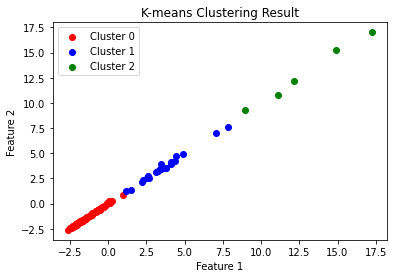

In [241]:
# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=0) # 클러스터의 수는 3으로 가정
kmeans.fit(cc)
labels = kmeans.labels_

# 클러스터링 결과를 데이터프레임에 추가
cc['Cluster'] = labels

# 클러스터별로 데이터 시각화
plt.scatter(cc.loc[cc['Cluster'] == 0, 'Feature_1'], cc.loc[cc['Cluster'] == 0, 'Feature_2'], c='red', label='Cluster 0')
plt.scatter(cc.loc[cc['Cluster'] == 1, 'Feature_1'], cc.loc[cc['Cluster'] == 1, 'Feature_2'], c='blue', label='Cluster 1')
plt.scatter(cc.loc[cc['Cluster'] == 2, 'Feature_1'], cc.loc[cc['Cluster'] == 2, 'Feature_2'], c='green', label='Cluster 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Result')
plt.legend()
plt.show()

In [246]:
cc[cc["Cluster"]==2]

,Feature_1,Feature_2,Cluster
행정구역,,,
전주시,11.120134,10.779048,2
제주시,12.171453,12.176695,2
창원시,17.265646,17.021799,2
천안시,8.944375,9.292094,2
청주시,14.870539,15.225731,2


In [239]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

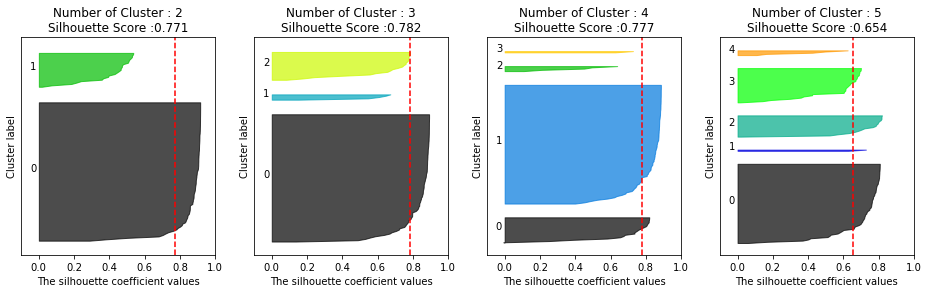

In [243]:
visualize_silhouette([2,3,4,5],cc)